<a href="https://colab.research.google.com/github/JonMaycon/DataScience/blob/main/WS_CamaraVereadores_Cba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

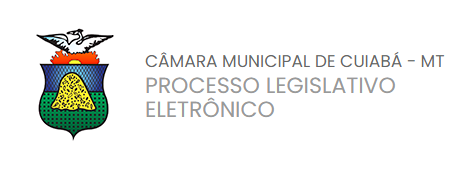

## Webscraping Projetos de Lei - Camara de Vereadores de Cuiabá - MT

In [39]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

In [40]:
# carregando variável com valor do "agente"
headers = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"

In [41]:
url = "https://legislativo.camaracuiaba.mt.gov.br/consulta-producao.aspx?tipo=103&ano_proposicao=2023"

headers = {}

response  = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html lang="pt-br">
 <head id="Head1">
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   PROCESSO LEGISLATIVO ELETRÔNICO | CÂMARA MUNICIPAL DE CUIABÁ - MT
  </title>
  <!-- inicio: Favicon -->
  <link href="/spl/img/favicon/favicon-16x16.png?v=2" rel="icon" sizes="16x16" type="image/png"/>
  <link color="#1e9ee6" href="/spl/img/favicon/safari-pinned-tab.svg?v=2" rel="mask-icon"/>
  <meta content="#ffffff" name="msapplication-TileColor"/>
  <meta content="#ffffff" name="theme-color"/>
  <!-- fim: Favicon -->
  <!-- inicio: Social meta -->
  <meta content="website" property="og:type"/>
  <meta content="PROCESSO LEGISLATIVO ELETRÔNICO | CÂMARA MUNICIPAL DE CUIABÁ - MT" property="og:title"/>
  <meta content="Este Portal disponibiliza o Banco de Dados da Produção Legislativa de CÂMARA MUNICIPAL DE CUIABÁ - MT" property="og:description"/>
  <meta content="/spl/img/share.png?v=2" property="og:image"/>
  <meta content

In [42]:
soup


<!DOCTYPE html>

<html lang="pt-br">
<head id="Head1"><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><title>
	PROCESSO LEGISLATIVO ELETRÔNICO | CÂMARA MUNICIPAL DE CUIABÁ - MT
</title>
<!-- inicio: Favicon -->
<link href="/spl/img/favicon/favicon-16x16.png?v=2" rel="icon" sizes="16x16" type="image/png"/>
<link color="#1e9ee6" href="/spl/img/favicon/safari-pinned-tab.svg?v=2" rel="mask-icon"/>
<meta content="#ffffff" name="msapplication-TileColor"/><meta content="#ffffff" name="theme-color"/>
<!-- fim: Favicon -->
<!-- inicio: Social meta -->
<meta content="website" property="og:type"/>
<meta content="PROCESSO LEGISLATIVO ELETRÔNICO | CÂMARA MUNICIPAL DE CUIABÁ - MT" property="og:title"/>
<meta content="Este Portal disponibiliza o Banco de Dados da Produção Legislativa de CÂMARA MUNICIPAL DE CUIABÁ - MT" property="og:description"/>
<meta content="/spl/img/share.png?v=2" property="og:image"/>
<meta content="pt_BR" property="og:locale"><meta c

In [43]:
ano_proposicoes = soup.findAll('span' , {'class': 'badge badge-info ajustar_fonte'})

In [44]:
ano_proposicoes

[<span class="badge badge-info ajustar_fonte">Tipo: <strong>Projeto de Lei</strong></span>,
 <span class="badge badge-info ajustar_fonte">Ano Proposição: <strong>2023</strong></span>]

In [45]:
# Encontra todos os elementos com a classe 'badge badge-info ajustar_fonte'
ano_proposicoes = soup.find_all('span', {'class': 'badge badge-info ajustar_fonte'})

# Lista para armazenar o texto sem as tags HTML
textos_sem_tags = []

# Itera sobre os elementos encontrados
for elemento in ano_proposicoes:
    # Obtém o texto de cada elemento sem as tags HTML
    texto_sem_tags = elemento.get_text(strip=True)
    textos_sem_tags.append(texto_sem_tags)

# Imprime ou faz o que desejar com os textos sem as tags HTML
for texto in textos_sem_tags:
    print(texto)


Tipo:Projeto de Lei
Ano Proposição:2023


In [47]:
#Busca Tag Contagem:
pagina_contagem = soup.find('div' , {'class': 'subheader-contagem'}).get_text()

In [48]:
pagina_contagem

'Localizada(s) 285 proposição(ões) para sua busca'

In [65]:
#Busca Tag com todas as informações do projeto:
pagina_full = soup.findAll('div' , {'class': 'kt-widget5__section'})

In [66]:
pagina_full

[<div class="kt-widget5__section">
 <a class="kt-widget5__title" href="processo.aspx?id=402207&amp;tipo=103&amp;ano_proposicao=2023">
                                             Projeto de Lei n° 287/2023
                                         </a>
 <br/>
 <a class="kt-widget5__desc" href="processo.aspx?id=402207&amp;tipo=103&amp;ano_proposicao=2023">
                                             AUTORIZA O MUNICÍPIO DE CUIABÁ A FIRMAR CONVÊNIO COM O INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE MATO GROSSO - CAMPUS SÃO VICENTE, POR INTERMÉDIO DA SECRETARIA MUNICIPAL DE EDUCAÇÃO, PARA VIABILIZAR O TRANSPORTE ESCOLAR DE ALUNOS DA REDE PÚBLICA.
                                         </a>
 <div class="kt-widget5__info">
 <span>Processo N°:</span>
 <a class="kt-font-info" href="processo.aspx?id=402207&amp;tipo=103&amp;ano_proposicao=2023">37972/2023</a>
 <span class="ml-3">Protocolo N°:</span>
 <a class="kt-font-info" href="processo.aspx?id=402207&amp;tipo=103&amp;ano_proposic

In [67]:
# Encontra todos os elementos com a classe 'badge badge-info ajustar_fonte'
pagina_full = soup.findAll('div' , {'class': 'kt-widget5__section'})

# Lista para armazenar o texto sem as tags HTML
textos_sem_tags = []

# Itera sobre os elementos encontrados
for elemento in pagina_full:
    # Obtém o texto de cada elemento sem as tags HTML
    texto_sem_tags = elemento.get_text(strip=True)
    textos_sem_tags.append(texto_sem_tags)

# Imprime ou faz o que desejar com os textos sem as tags HTML
for texto in textos_sem_tags:
    print(texto)


Projeto de Lei n° 287/2023AUTORIZA O MUNICÍPIO DE CUIABÁ A FIRMAR CONVÊNIO COM O INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE MATO GROSSO - CAMPUS SÃO VICENTE, POR INTERMÉDIO DA SECRETARIA MUNICIPAL DE EDUCAÇÃO, PARA VIABILIZAR O TRANSPORTE ESCOLAR DE ALUNOS DA REDE PÚBLICA.Processo N°:37972/2023Protocolo N°:21251ID:402207Data:01/11/2023 09:13:55Situação:TramitandoAutor(es) da Proposição:Johnny Everson
Projeto de Lei n° 286/2023CRIA O PROCON DA CÂMARA MUNICIPAL DE CUIABÁ E DÁ OUTRAS PROVIDÊNCIAS.Processo N°:37788/2023Protocolo N°:21067ID:401413Data:31/10/2023 09:42:03Situação:TramitandoAutor(es) da Proposição:Marcus Brito Junior (Câmara Digital)
Projeto de Lei n° 285/2023INSTITUI O SELO 	EQUIDADE NAS EMPRESAS ÀS EMPRESAS DO MUNICÍPIO DE CUIABÁ QUE COMPROVEM A PROMOÇÃO E DEFESA DOS DIREITOS DA MULHER.Processo N°:37660/2023Protocolo N°:20928ID:400785Data:27/10/2023 13:20:12Situação:TramitandoAutor(es) da Proposição:Maysa Leão (Câmara Digital)
Projeto de Lei n° 284/2023INSTITUI 

In [52]:
pagina_projetolei = soup.findAll('a' , {'class': 'kt-widget5__title'})

In [53]:
pagina_projetolei

[<a class="kt-widget5__title" href="processo.aspx?id=402207&amp;tipo=103&amp;ano_proposicao=2023">
                                             Projeto de Lei n° 287/2023
                                         </a>,
 <a class="kt-widget5__title" href="processo.aspx?id=401413&amp;tipo=103&amp;ano_proposicao=2023">
                                             Projeto de Lei n° 286/2023
                                         </a>,
 <a class="kt-widget5__title" href="processo.aspx?id=400785&amp;tipo=103&amp;ano_proposicao=2023">
                                             Projeto de Lei n° 285/2023
                                         </a>,
 <a class="kt-widget5__title" href="processo.aspx?id=400643&amp;tipo=103&amp;ano_proposicao=2023">
                                             Projeto de Lei n° 284/2023
                                         </a>,
 <a class="kt-widget5__title" href="processo.aspx?id=400670&amp;tipo=103&amp;ano_proposicao=2023">
                             

In [54]:
# Encontra todos os elementos com a classe 'badge badge-info ajustar_fonte'
pagina_projetolei = soup.findAll('a' , {'class': 'kt-widget5__title'})

# Lista para armazenar o texto sem as tags HTML
textos_sem_tags = []

# Itera sobre os elementos encontrados
for elemento in pagina_projetolei:
    # Obtém o texto de cada elemento sem as tags HTML
    texto_sem_tags = elemento.get_text(strip=True)
    textos_sem_tags.append(texto_sem_tags)

# Imprime ou faz o que desejar com os textos sem as tags HTML
for texto in textos_sem_tags:
    print(texto)

Projeto de Lei n° 287/2023
Projeto de Lei n° 286/2023
Projeto de Lei n° 285/2023
Projeto de Lei n° 284/2023
Projeto de Lei n° 283/2023
Projeto de Lei n° 282/2023
Projeto de Lei n° 281/2023
Projeto de Lei n° 280/2023
Projeto de Lei n° 279/2023
Projeto de Lei n° 278/2023


In [55]:
pagina_naturezaproj = soup.findAll('a' , {'class': 'kt-widget5__desc'})

In [56]:
pagina_naturezaproj

[<a class="kt-widget5__desc" href="processo.aspx?id=402207&amp;tipo=103&amp;ano_proposicao=2023">
                                             AUTORIZA O MUNICÍPIO DE CUIABÁ A FIRMAR CONVÊNIO COM O INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE MATO GROSSO - CAMPUS SÃO VICENTE, POR INTERMÉDIO DA SECRETARIA MUNICIPAL DE EDUCAÇÃO, PARA VIABILIZAR O TRANSPORTE ESCOLAR DE ALUNOS DA REDE PÚBLICA.
                                         </a>,
 <a class="kt-widget5__desc" href="processo.aspx?id=401413&amp;tipo=103&amp;ano_proposicao=2023">
                                             CRIA O PROCON DA CÂMARA MUNICIPAL DE CUIABÁ E DÁ OUTRAS PROVIDÊNCIAS.
                                         </a>,
 <a class="kt-widget5__desc" href="processo.aspx?id=400785&amp;tipo=103&amp;ano_proposicao=2023">
                                             INSTITUI O SELO 	EQUIDADE NAS EMPRESAS ÀS EMPRESAS DO MUNICÍPIO DE CUIABÁ QUE COMPROVEM A PROMOÇÃO E DEFESA DOS DIREITOS DA MULHER.
               

In [57]:
# Encontra todos os elementos com a classe 'badge badge-info ajustar_fonte'
pagina_naturezaproj = soup.findAll('a' , {'class': 'kt-widget5__desc'})

# Lista para armazenar o texto sem as tags HTML
textos_sem_tags = []

# Itera sobre os elementos encontrados
for elemento in pagina_naturezaproj:
    # Obtém o texto de cada elemento sem as tags HTML
    texto_sem_tags = elemento.get_text(strip=True)
    textos_sem_tags.append(texto_sem_tags)

# Imprime ou faz o que desejar com os textos sem as tags HTML
for texto in textos_sem_tags:
    print(texto)

AUTORIZA O MUNICÍPIO DE CUIABÁ A FIRMAR CONVÊNIO COM O INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE MATO GROSSO - CAMPUS SÃO VICENTE, POR INTERMÉDIO DA SECRETARIA MUNICIPAL DE EDUCAÇÃO, PARA VIABILIZAR O TRANSPORTE ESCOLAR DE ALUNOS DA REDE PÚBLICA.
CRIA O PROCON DA CÂMARA MUNICIPAL DE CUIABÁ E DÁ OUTRAS PROVIDÊNCIAS.
INSTITUI O SELO 	EQUIDADE NAS EMPRESAS ÀS EMPRESAS DO MUNICÍPIO DE CUIABÁ QUE COMPROVEM A PROMOÇÃO E DEFESA DOS DIREITOS DA MULHER.
INSTITUI A SEMANA MUNICIPAL DA CONSCIENTIZAÇÃO DO USO DO CORDÃO DE GIRASSOL, NO ÂMBITO DO MUNICÍPIO DE CUIABÁ
DISPÕE SOBRE A REALIZAÇÃO DO EXAME “TESTE DO OLHINHO” PARA DETECÇÃO DO CÂNCER NOS OLHOS EM RECÉM-NASCIDOS, NO ÂMBITO DO MUNICÍPIO DE CUIABÁ.
RECONHECE A VISÃO MONOCULAR COMO DEFICIÊNCIA VISUAL, E DÁ OUTRAS PROVIDÊNCIAS.
DISPÕE SOBRE A CONCESSÃO DE INSENÇÃO DO IMPOSTO PREDIAL E TERRITORIAL URBANO (IPTU), SOBRE IMÓVEL INTEGRANTE DO PATRIMÔNIO DE PORTADORES DE NEOPLASTIA MALIGNA (CÂNCER), E DÁ OUTRAS PROVIDÊNCIAS.
ESTABELECE DI

In [58]:
#Busca Nº do Processo:
pagina_numprocesso = soup.findAll('div' , {'class': 'kt-widget5__info'})

In [59]:
pagina_numprocesso

[<div class="kt-widget5__info">
 <span>Processo N°:</span>
 <a class="kt-font-info" href="processo.aspx?id=402207&amp;tipo=103&amp;ano_proposicao=2023">37972/2023</a>
 <span class="ml-3">Protocolo N°:</span>
 <a class="kt-font-info" href="processo.aspx?id=402207&amp;tipo=103&amp;ano_proposicao=2023">21251</a>
 <span class="ml-3">ID:</span>
 <span class="kt-font-info">402207</span>
 <span class="ml-3">Data:</span>
 <span class="kt-font-info">01/11/2023 09:13:55</span>
 <span class="ml-3">Situação:</span>
 <span class="kt-font-info">Tramitando</span>
 </div>,
 <div class="kt-widget5__info">
 <span>Autor(es) da Proposição:</span>
 <span class="kt-font-info"><a href="consulta-producao.aspx?autor=8193" target="_blank">Johnny Everson</a></span>
 </div>,
 <div class="kt-widget5__info">
 <span>Processo N°:</span>
 <a class="kt-font-info" href="processo.aspx?id=401413&amp;tipo=103&amp;ano_proposicao=2023">37788/2023</a>
 <span class="ml-3">Protocolo N°:</span>
 <a class="kt-font-info" href="pro

In [60]:
# Encontra todos os elementos com a classe 'badge badge-info ajustar_fonte'
pagina_numprocesso = soup.findAll('div' , {'class': 'kt-widget5__info'})

# Lista para armazenar o texto sem as tags HTML
textos_sem_tags = []

# Itera sobre os elementos encontrados
for elemento in pagina_numprocesso:
    # Obtém o texto de cada elemento sem as tags HTML
    texto_sem_tags = elemento.get_text(strip=True)
    textos_sem_tags.append(texto_sem_tags)

# Imprime ou faz o que desejar com os textos sem as tags HTML
for texto in textos_sem_tags:
    print(texto)

Processo N°:37972/2023Protocolo N°:21251ID:402207Data:01/11/2023 09:13:55Situação:Tramitando
Autor(es) da Proposição:Johnny Everson
Processo N°:37788/2023Protocolo N°:21067ID:401413Data:31/10/2023 09:42:03Situação:Tramitando
Autor(es) da Proposição:Marcus Brito Junior (Câmara Digital)
Processo N°:37660/2023Protocolo N°:20928ID:400785Data:27/10/2023 13:20:12Situação:Tramitando
Autor(es) da Proposição:Maysa Leão (Câmara Digital)
Processo N°:37555/2023Protocolo N°:20817ID:400643Data:27/10/2023 12:36:52Situação:Arquivado
Autor(es) da Proposição:Maysa Leão (Câmara Digital)
Processo N°:37554/2023Protocolo N°:20816ID:400670Data:27/10/2023 12:36:47Situação:Arquivado
Autor(es) da Proposição:Maysa Leão (Câmara Digital)
Processo N°:37553/2023Protocolo N°:20815ID:400696Data:27/10/2023 12:36:42Situação:Tramitando
Autor(es) da Proposição:Maysa Leão (Câmara Digital)
Processo N°:37552/2023Protocolo N°:20814ID:400703Data:27/10/2023 12:36:37Situação:Tramitando
Autor(es) da Proposição:Maysa Leão (Câmara 

**Teste de TAG**

In [61]:
#tabela_info = soup.find('div' , {'class': 'kt-portlet__body'})

In [62]:
#tabela_info